### **Tesla Stock Price Predictor**
*   Tesla Stock Price Predictor
*   Uses Kaggle Dataset




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/MyCapstoneProject/

/content/drive/MyDrive/MyCapstoneProject


In [3]:
!ls /content/drive/MyDrive/MyCapstoneProject/TeslaData/

TESLA.csv


## This Project is based on the TESLA Stock Price Prediction Data from Kaggel
(https://www.kaggle.com/datasets/amohankumar/tesla-stock-price-prediction-dataset?resource=download)


*   The Dataset contains 253 entries of stock data ranging from Date, Open, High, Low, Close, Adj Close and Volume
*   My Projects task is to create a machine learning model to predict the value of stock based on previous stock characteristics.



## Step 1: Reading the data with python
This is an integral step in the process of data analysis. It is needed to understand the data and domain before attempting to apply a machine learning algorithm.

In [4]:
#This will supress the warning messages
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Now we will read the dataset using Pandas and numpy
import pandas as pd
import numpy as np
TeslaData = pd.read_csv('/content/drive/MyDrive/MyCapstoneProject/TeslaData/TESLA.csv', encoding='latin')
print('Shape before deleting duplicate values:', TeslaData.shape)

#Now well remove duplicates from the 253
TeslaData=TeslaData.drop_duplicates()
print('Shape After deleting duplicting value:', TeslaData.shape)

#Printing sample data
#Start observing the Quatitative, Categorical and Qualitative variables
TeslaData.head(10)

Shape before deleting duplicate values: (253, 7)
Shape After deleting duplicting value: (253, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-29,259.933319,264.500000,256.893341,260.436676,260.436676,62828700
1,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000
2,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200
3,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900
4,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800
5,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400
6,2021-10-07,261.820007,268.333344,261.126678,264.536682,264.536682,57587400
7,2021-10-08,265.403320,265.459991,260.303345,261.829987,261.829987,50215800
8,2021-10-11,262.549988,267.079987,261.833344,263.980011,263.980011,42600900
9,2021-10-12,266.976654,270.773346,265.523346,268.573334,268.573334,66060000


##Observations from step 1 about data description

*   This file contains 253 entities from the Tesla stock
betweeen the periods of 2021-09-29 - 2022-09-29
*   There are a total of 7 attrubutes outlined below
    * Date - Date of the data's occurance
    * Open - The opening Value of the stock price
    * High - Highest value of the stock on the date
    * Low - Lowest value of the stock on the date
    * Close - final value of the stock at the end of the date
    * Adj Close - A modified closing price that represents actions by the corporation using data like dividends and other factors that can minimise the reliability of the standard Close stock data
    * Volume - The volume of shares that were exchanged on that given date.









##Step 2: Problem Statement Definition

*   Creating a prediction model to predict the closing value(Adj Close) of the stock
*   Target Variable: Close
*   predictors: Date, Open, Low, High, Adj Close, Volume



##Step 3: Choosing an appropriate ML/AI Algorithm for the Datas Analysis
After analysing the data set and determining its target variable in step 2, I have determined that the best machine learning algorithm for the stock price predictor would be a regression model due to its history based numeric data that has a continous target variable (Close) that is a decimal value which can be sub divided into smaller parts and has an infinite possibility of values between 2 points.   



##Step 4: Looking at the class distribution and Target Variable distribution to check if the data is balanced or skewed.
*   To ensure the return of useful results the target variables distribution cannot be too slewed than the predictive modelling.
*   This means that ideally a bell curve distribution of data is preferable though slightly negative or positive skewed distribution is also ok.
*   For the use of regression algortigm modelling and anlaysis, the developed histograms should be made to resemble a bell curve or slightly skewed version of it. Or else this can impact the the machine learning algorithms ability to leran from the provided data.



<Axes: >

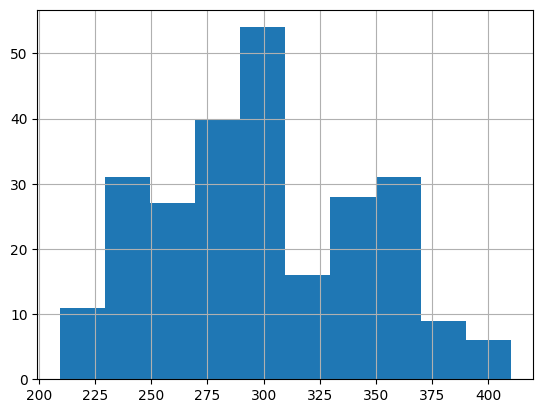

In [6]:
%matplotlib inline
#We create a histogram to visualise the target variable as it is continuous, helping us interpret the distribution of the Close values.
TeslaData['Close'].hist()

##Observations from step 4
*   The distribution of the traget variables data on the histogram is slightly positively skewed which means it is not ideal.
*   Furthermore there are enough numbers of rows for the values to learn from.



##Step 5: Basic Exploratory Data Analysis
*   In this step we will guage the overall data.
*   The volume of data, the types of columns present in the data
*   Initial assessment of the data should be done to identityf which columns are Quantative, Categorical or Qualitive.
*   This step will help start the column/data rejection process
*   Each column must be analyised to determine its affect to the values of the target variable. If the analysis finds that the column has no affect on the target variable then it should removed from the data. If it does have an effect it must be kept to be analysied further.





In [7]:
#First we identify the "Head" rows of data or the first few rows
TeslaData.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-29,259.933319,264.500000,256.893341,260.436676,260.436676,62828700
1,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000
2,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200
3,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900
4,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800


In [8]:
#Then we identify the "Tail sets of data or the few last rows of data"
TeslaData.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
248,2022-09-23,283.089996,284.500000,272.820007,275.329987,275.329987,63615400
249,2022-09-26,271.829987,284.089996,270.309998,276.010010,276.010010,58076900
250,2022-09-27,283.839996,288.670013,277.510010,282.940002,282.940002,61925200
251,2022-09-28,283.079987,289.000000,277.570007,287.809998,287.809998,54664800
252,2022-09-29,282.760010,283.649994,265.779999,268.209991,268.209991,77393100


In [9]:
#from here we will analyse the data for null values and values that have a missing values occurance > 30% and remove those values
#As you can see there a no signs of null or missing values in the Tesla Stock data set and I am making the assumption that the ML algorithm will need Dates for its calculations
TeslaData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [10]:
#Descriptive Statistics of the Tesla Stock data
TeslaData.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume
count,253,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
unique,253,NaN,NaN,NaN,NaN,NaN,NaN
top,2021-09-29,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,300.136008,307.486021,292.114058,299.709104,299.709104,8.050938e+07
std,NaN,46.139272,46.789896,44.685331,45.788283,45.788283,2.546595e+07
min,NaN,207.949997,217.973328,206.856674,209.386673,209.386673,3.504270e+07
25%,NaN,266.513336,273.166656,260.723328,266.923340,266.923340,6.255570e+07
50%,NaN,298.500000,303.709991,289.130005,296.666656,296.666656,7.695630e+07
75%,NaN,335.600006,344.950012,327.510010,336.336670,336.336670,9.347310e+07


In [11]:
#Then we find the amount of unique values of each column which as you can see below it is quiet rare for any 2 values in the data set to repeat and almost all are unique.
#This would typically indicate that every column is usable categorical data
TeslaData.nunique()

Date         253
Open         249
High         251
Low          251
Close        252
Adj Close    252
Volume       253
dtype: int64

##Observations from Step 5: Basic Exploratory Data Analysis
Now that we understand the nature of our data after our observation and analysis of each column, we have created a roadmap to begin a deeper analysis of the data set. This means we can start to select our columns that will be used in the Algorithm, and as we further develop our model some may be removed.
* Date - Continuous - Selected
* Open - Continuous - Selected
* High - Continuous - Selected
* Low - Continuous - Selected
* Close - Continuous - Selected - Is the target variable which will be predicted by the proposed model
* Volume - continuous - selected
* Adj Close - Continuous - Selected

##Step 7: Removal of Unwanted Columns
*   There were no qualitative columns in the data and as such none were removed.


##Step 8: Visual Exploratory Data Analysis
*   The distribution of Categorical predictor variables in this dataset is non existent as there are no variables that contain < 20 unique values and as such no categorical data needs to be analised



##Step 9: Visualising distribution of all the conitnuous predictor variables in the data using histograms
*   Now because there was no qualatitive columns in our data set we can now visualise the continuous predictor variables using histogram.



array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Adj Close'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Volume'}>]], dtype=object)

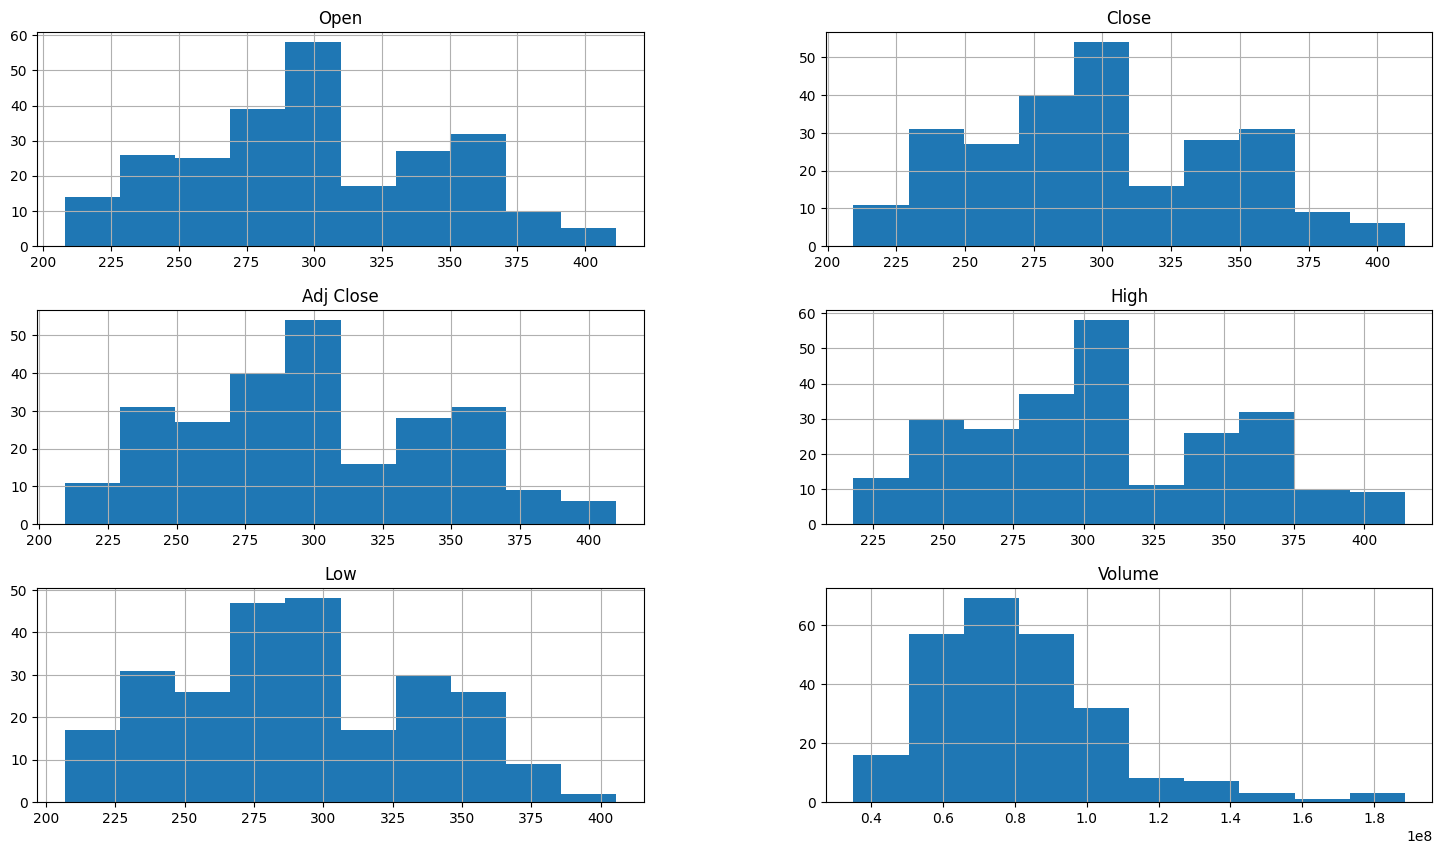

In [12]:
#plot the Histograms
TeslaData.hist(['Open','Close','Adj Close', 'High', 'Low', 'Volume'], figsize=(18,10))

##Observations from step 9
*   Open, Close, Adj Close and Low all share similar qualities and nearly mirror one another in distribution, This could possibly indicate a relationship between the data and their outcomes that we can use to determine the result of our target variable (Close). This means the distributions of data for all these variables is good.
*   Volume has a positively skewed distribution and could be used to determine the effects the volume of traded shares has on the adjusted close target variable.


##Step 10: Outlier Analysis
*   There were no found outliers in the histographs of each variables column meaning there is no need for this step.



##Step 11: Visualising Data Distribution after outlier removal
*   Again becasue there was no found outlier there is no need to visualise the data after the removal of the outlier as there was no change to the data.




##Step 12: Missing Value Analysis
*   As you can see belwo there are no null values in our dataset and as such nothing needs to be changed in this step


In [13]:
TeslaData.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

##Step 13: Feature Selection (Attibute Selection)
*   Because all the Tesla Stock data is continuous we will only need to use Scatter plots to determine the relationships between variables





##Relationship exploration: Continuous Vs Continuous Scatter Charts
*   All Values are continuous in my data set meaning that we only use scatterplots to visualise the relationships between our data



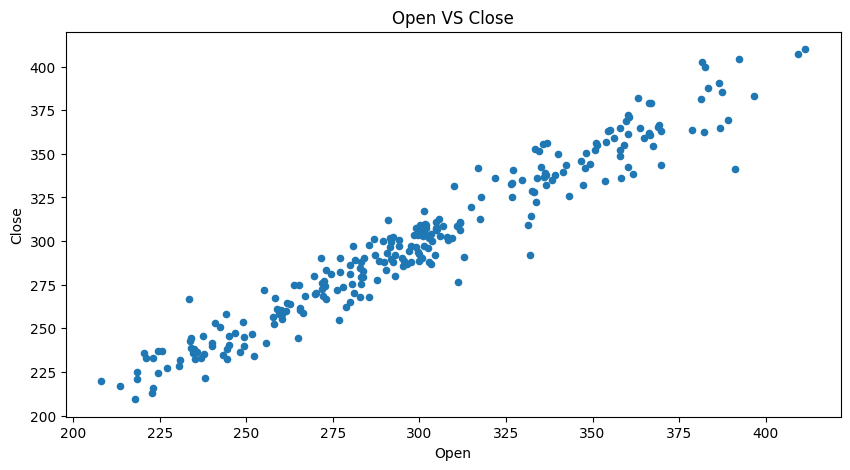

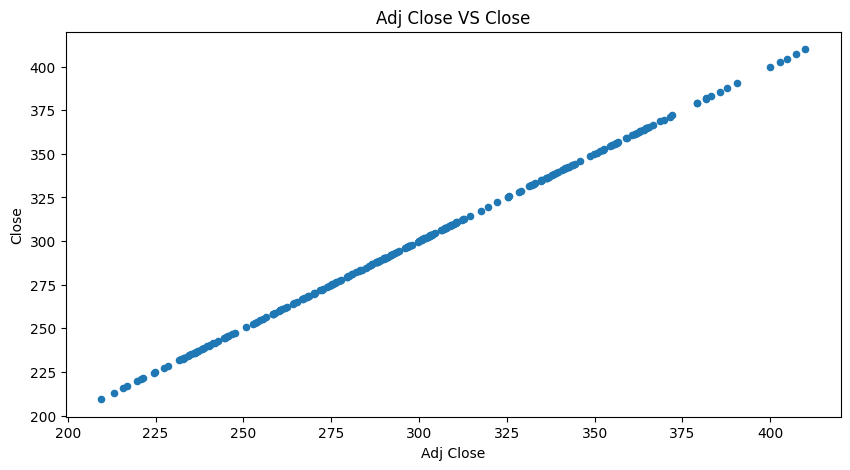

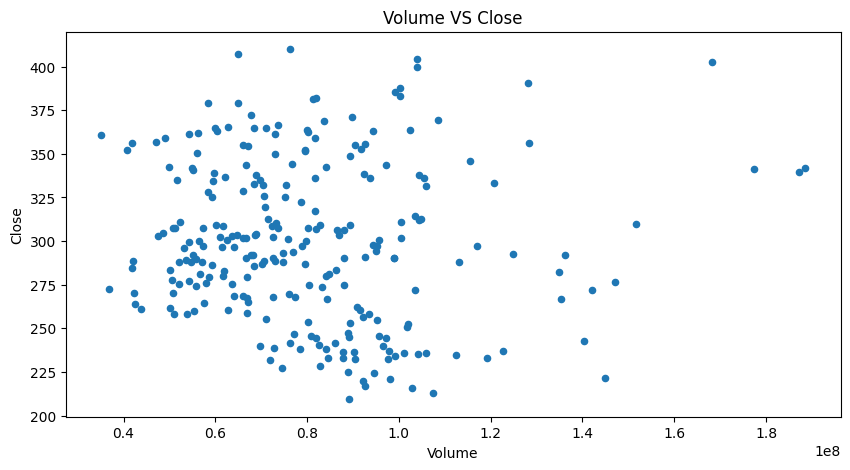

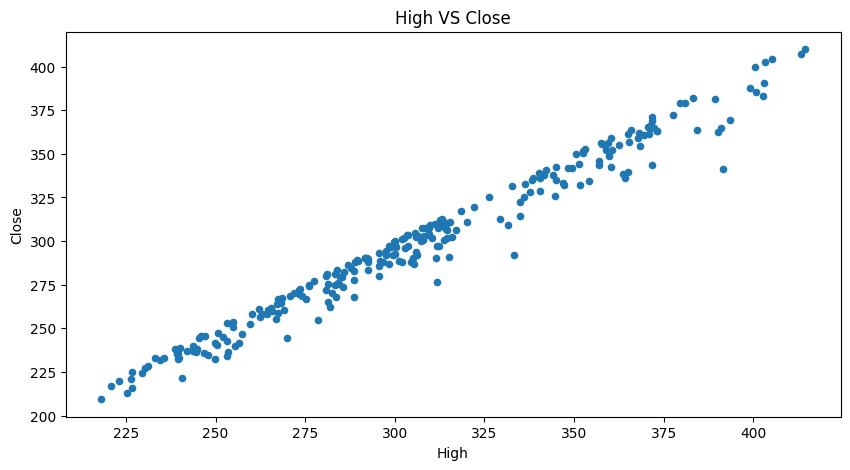

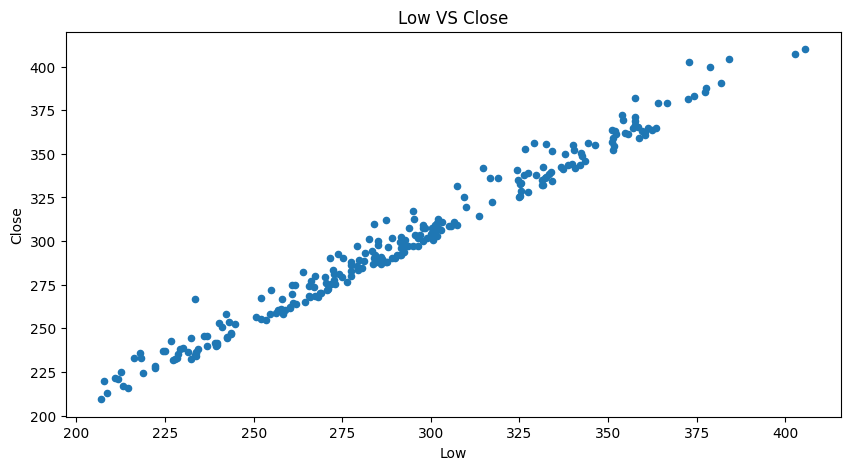

In [14]:
ContinuousCols = ['Open', 'Adj Close', 'Volume', 'High', 'Low']

for predictor in ContinuousCols:
  TeslaData.plot.scatter(x=predictor, y='Close', figsize=(10,5), title=predictor+' VS '+ 'Close')

##Scatter Charts Interpretation
*   As can be seen in the scatter charts above, the Low, High, Adj Close and Open all share an strong positive correlation when compared to our Close target variable. This means those variables are directly proportional to each other making a great fit for our Machine Learning model building.  
*   Volume on the other shows no trend when compared to our target variable wiht no correlation between the two. Meaning we will not be using it for Machine learning model.  
* Because of the near 1:1 correlation Adj Close has with Close other data will not be utilised to predict the outcome and as such we need to remove adj close from our data set to ensure it doesnt make predictions off Adj Close alone




In [15]:
TeslaData.drop(['Adj Close'], axis=1, inplace=True)
print(TeslaData)

           Date        Open        High         Low       Close    Volume
0    2021-09-29  259.933319  264.500000  256.893341  260.436676  62828700
1    2021-09-30  260.333344  263.043335  258.333344  258.493347  53868000
2    2021-10-01  259.466675  260.260010  254.529999  258.406677  51094200
3    2021-10-04  265.500000  268.989990  258.706665  260.510010  91449900
4    2021-10-05  261.600006  265.769989  258.066681  260.196655  55297800
..          ...         ...         ...         ...         ...       ...
248  2022-09-23  283.089996  284.500000  272.820007  275.329987  63615400
249  2022-09-26  271.829987  284.089996  270.309998  276.010010  58076900
250  2022-09-27  283.839996  288.670013  277.510010  282.940002  61925200
251  2022-09-28  283.079987  289.000000  277.570007  287.809998  54664800
252  2022-09-29  282.760010  283.649994  265.779999  268.209991  77393100

[253 rows x 6 columns]


##Step 14: Statistical Feature selection using correlation value
*   In this step we will calculate the pearson correlation coefficient to determine the magnitude of each variables correltaion with our target vriable with any varible scoring > 0.5 making it a good relationship for our Machine Learning.




In [16]:
ContinuousCols=['Close', 'Open', 'High', 'Low', 'Volume']

CorrelationData = TeslaData[ContinuousCols].corr()
CorrelationData

,Close,Open,High,Low,Volume
Close,1.000000,0.971783,0.986715,0.990137,-0.047791
Open,0.971783,1.000000,0.991269,0.986364,-0.047793
High,0.986715,0.991269,1.000000,0.988299,0.008397
Low,0.990137,0.986364,0.988299,1.000000,-0.104980
Volume,-0.047791,-0.047793,0.008397,-0.104980,1.000000


In [17]:
#Now that we have all our data Calculated to the coefficient we can filter columns with only a correlation > 0.5 wiht ur target variable
CorrelationData['Close'][abs(CorrelationData['Close'] > 0.5)]

Close    1.000000
Open     0.971783
High     0.986715
Low      0.990137
Name: Close, dtype: float64

##Step 15 Observations
*   The Final list of Continuous columns is
  * Open
  * High
  * Low




##Step 15/16 Categorical vs Continuous
We dont have any Categorical values and as such do not need to complete this step.

##Step 17: Final Predictors/Features for building Machine Learning/AI model
*   Now that we have analysed the correlation between our data we can fianlise the Features for our model and save them and start the pre-process for our Machine Learning Model.



In [18]:
SelectedColumns=['Open', 'High', 'Low']

DataForML=TeslaData[SelectedColumns]
DataForML.head()

,Open,High,Low
0,259.933319,264.500000,256.893341
1,260.333344,263.043335,258.333344
2,259.466675,260.260010,254.529999
3,265.500000,268.989990,258.706665
4,261.600006,265.769989,258.066681


In [19]:
DataForML.to_pickle('DataForML.pkl')

##Converting Nominal variables to Numeric values

In [20]:
DataForML_Numeric=pd.get_dummies(DataForML)

DataForML_Numeric["Close"] = TeslaData['Close']

DataForML_Numeric.head()

,Open,High,Low,Close
0,259.933319,264.500000,256.893341,260.436676
1,260.333344,263.043335,258.333344,258.493347
2,259.466675,260.260010,254.529999,258.406677
3,265.500000,268.989990,258.706665,260.510010
4,261.600006,265.769989,258.066681,260.196655


##Step 18: Machine Learning Model Development:
*   We now need to split our data into Training and Testing samples which is usually created to a ratio of of 70% training data and 30% for testing data.




In [21]:
DataForML_Numeric.columns

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

In [22]:
from ast import Yield
TargetVariable = 'Close'
Predictors=['High', 'Low', 'Open']
X = DataForML_Numeric[Predictors].values
Y = DataForML_Numeric[TargetVariable].values

#We now split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=428)

##Step 19: Standardisation/Normalisation of data
* In this step we will Normalise our data as we will be using <Insert Method here>

In [23]:
#Standardising data
from sklearn.preprocessing import StandardScaler

#We will be using standardisation for out normalisation as it use of Mean and standard deviation is arguagbly more applicable to our data
PredictorScaler = StandardScaler()

#the fit is stored for later
PredictorScalerFit=PredictorScaler.fit(X)

#Creating the standardised values of X
X=PredictorScalerFit.transform(X)

#Splitting data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [24]:
#Check the sampled data
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(177, 3)
(177,)
(76, 3)
(76,)


##Step 20: Multiple Linear Regression Algorithm for ML/AI model building


In [25]:
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

#print parameters
print(RegModel)

#Developing the model on training data
LREG = RegModel.fit(X_train,Y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
#Measuring quality of fit in Training data
print('R2 Values:',metrics.r2_score(Y_train, LREG.predict(X_train)))

print('\n#### Model Validation and Accuracy Calculations #######')

#Print Sample Values for prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=Y_test
TestingDataResults[('Predicted '+TargetVariable)]=np.round(prediction)

#Print the sampled prediction values
print(TestingDataResults.head())

#Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Close']-TestingDataResults['Predicted Close']))/TestingDataResults['Close'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy = 100 - MAPE
MedianAccuracy=100 - MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)

#Creating a custom function for calculating the accuracy also ensure there are no zero values
def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  return(100-MAPE)

#Custom scoring MAPE calc
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

#importing cross validation
from sklearn.model_selection import cross_val_score

#we need to cross validate a given algorithm passing the full data of X and Y as the K fold splits data automatically into Train/Test
Accuracy_Values=cross_val_score(RegModel, X, Y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold cross validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Values: 0.9902695369579309

#### Model Validation and Accuracy Calculations #######
       High       Low      Open       Close  Predicted Close
0 -0.517932 -0.433081 -0.435835  280.899994            277.0
1 -0.838435 -0.694832 -0.832088  264.536682            267.0
2  0.585986  0.479538  0.694435  314.633331            319.0
3 -0.571753 -0.479870 -0.519371  272.243347            275.0
4 -0.338764 -0.378368 -0.502505  290.533325            288.0
Mean Accuracy on test data: 98.78726185672274
Median Accuracy on test data: 98.8762734918257

Accuracy values for 10-fold cross validation:
 [99.1012797  98.94516776 98.75934196 98.34973459 98.78485598 98.58786141
 98.70412816 98.8198782  99.03399031 99.13283279]

Final Average Accuracy of the model: 98.82


##Decision Tree Regressor

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.992727206124594

### Model Validation and Accuracy Calculaions ###
       High       Low      Open       Close  PredictedClose
0 -0.517932 -0.433081 -0.435835  280.899994           276.0
1 -0.838435 -0.694832 -0.832088  264.536682           261.0
2  0.585986  0.479538  0.694435  314.633331           324.0
3 -0.571753 -0.479870 -0.519371  272.243347           276.0
4 -0.338764 -0.378368 -0.502505  290.533325           281.0
Mean Accuracy on test data: 97.72476433643645
Median Accuracy on test data: 97.96400880769272

Accuracy values for 10 fold cross Validation:
 [98.1058642  97.89561433 98.31435865 97.22622642 97.89060486 97.55153967
 97.77658567 97.8088061  98.4447394  98.64045989]

Final Average Accuracy of the model: 97.97


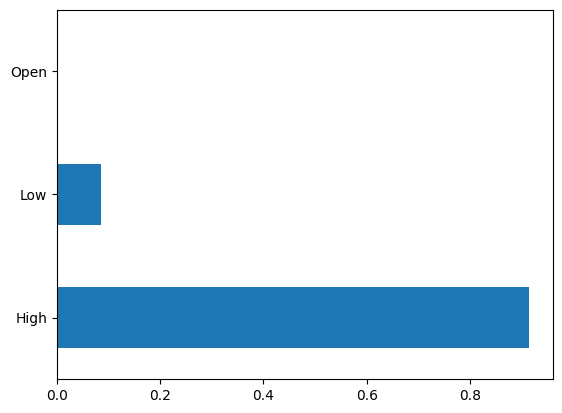

In [26]:
#Decision Trees have multiple if-else statements
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
#range of max depth = 2 to 20

#Print Parameters on the decision tree
print(RegModel)

#Creatin model training data
DT=RegModel.fit(X_train,Y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
print('R2 Value:', metrics.r2_score(Y_train, DT.predict(X_train)))

#plotting the feature importance for top 10 columns
%matplotlib inline
feature_importances=pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

print('\n### Model Validation and Accuracy Calculaions ###')

#Printing sample values of predictions
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=Y_test
TestingDataResults[('Predicted' + TargetVariable)]=np.round(prediction)

print(TestingDataResults.head())

#calc error for each row
TestingDataResults['APE']=100 * ((abs(
    TestingDataResults['Close']-TestingDataResults['PredictedClose']))/TestingDataResults['Close'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy = 100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)

#Custom function for calculating accuracy
def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  return(100-MAPE)

from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(RegModel, X, Y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10 fold cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))

##Plotting/Visualising the Decision Tree

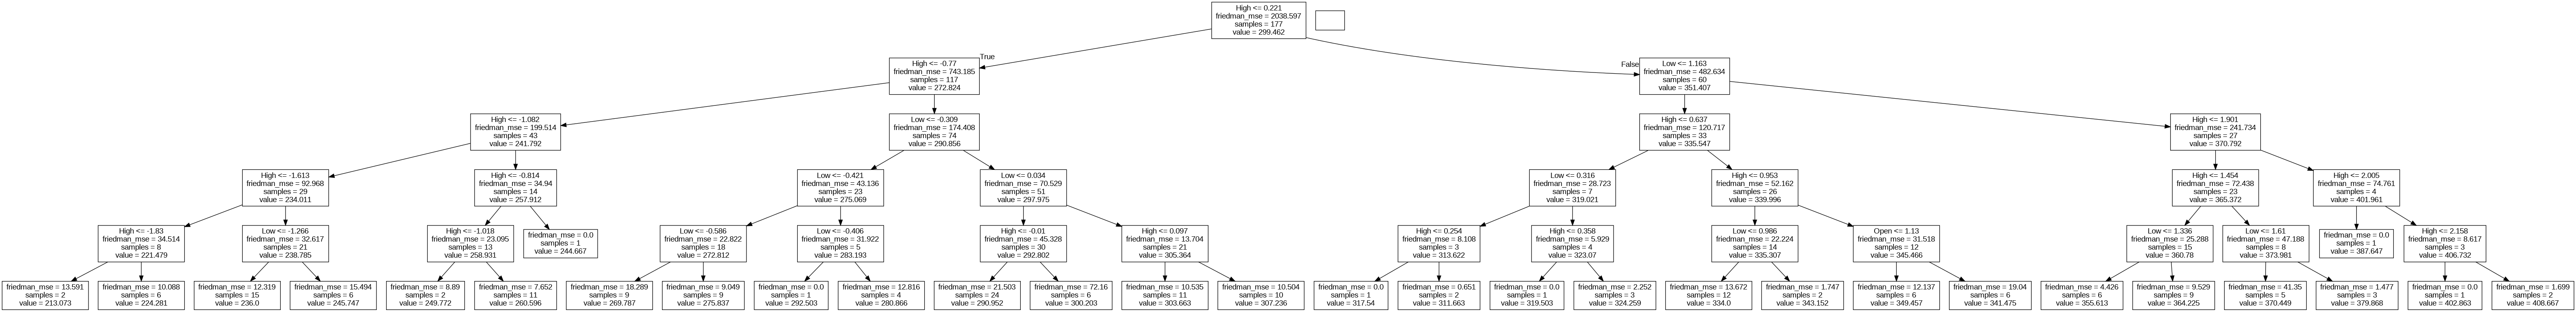

In [27]:
from IPython.display import Image
from sklearn import tree
import pydotplus

#Create dot data
dot_data= tree.export_graphviz(RegModel, out_file=None,
                               feature_names=Predictors, class_names=TargetVariable)

graph = pydotplus.graph_from_dot_data(dot_data)

#Show graph
Image(graph.create_png(), width=5000, height=2000)

##Random Forest Regressor

RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
R2 Value: 0.9906034059179843

##### Model Validation and Accuracy Calculations ##########
       High       Low      Open       Close  Predicted Close
0 -0.517932 -0.433081 -0.435835  280.899994            276.0
1 -0.838435 -0.694832 -0.832088  264.536682            264.0
2  0.585986  0.479538  0.694435  314.633331            324.0
3 -0.571753 -0.479870 -0.519371  272.243347            275.0
4 -0.338764 -0.378368 -0.502505  290.533325            283.0
Mean Accuracy on test data: 98.0151890800849
Median Accuracy on test data: 98.2726937586725

Accuracy values for 10-fold Cross Validation:
 [98.64536125 98.26804126 98.37454142 97.54926571 98.07625309 98.01975363
 97.72223019 98.3460716  98.55950776 98.81576909]

Final Average Accuracy of the model: 98.24


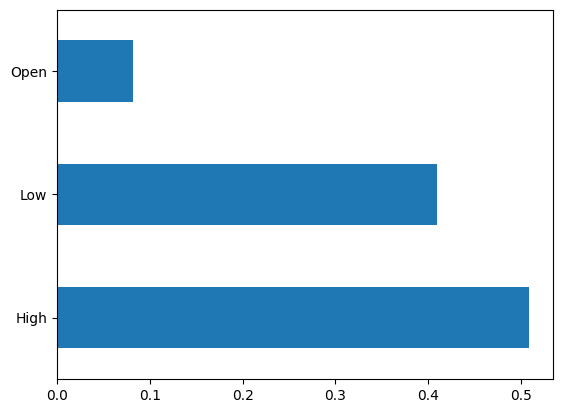

In [28]:
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='friedman_mse')
#range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,Y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
print('R2 Value:',metrics.r2_score(Y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=Y_test
TestingDataResults[('Predicted '+TargetVariable)]=np.round(prediction)

# Printing prediction values
print(TestingDataResults.head())

# Calculating the errors
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Close']-TestingDataResults['Predicted Close']))/TestingDataResults['Close'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)

from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(RegModel, X , Y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

##Plotting One of the Decision Tree in Random Forest Regressor

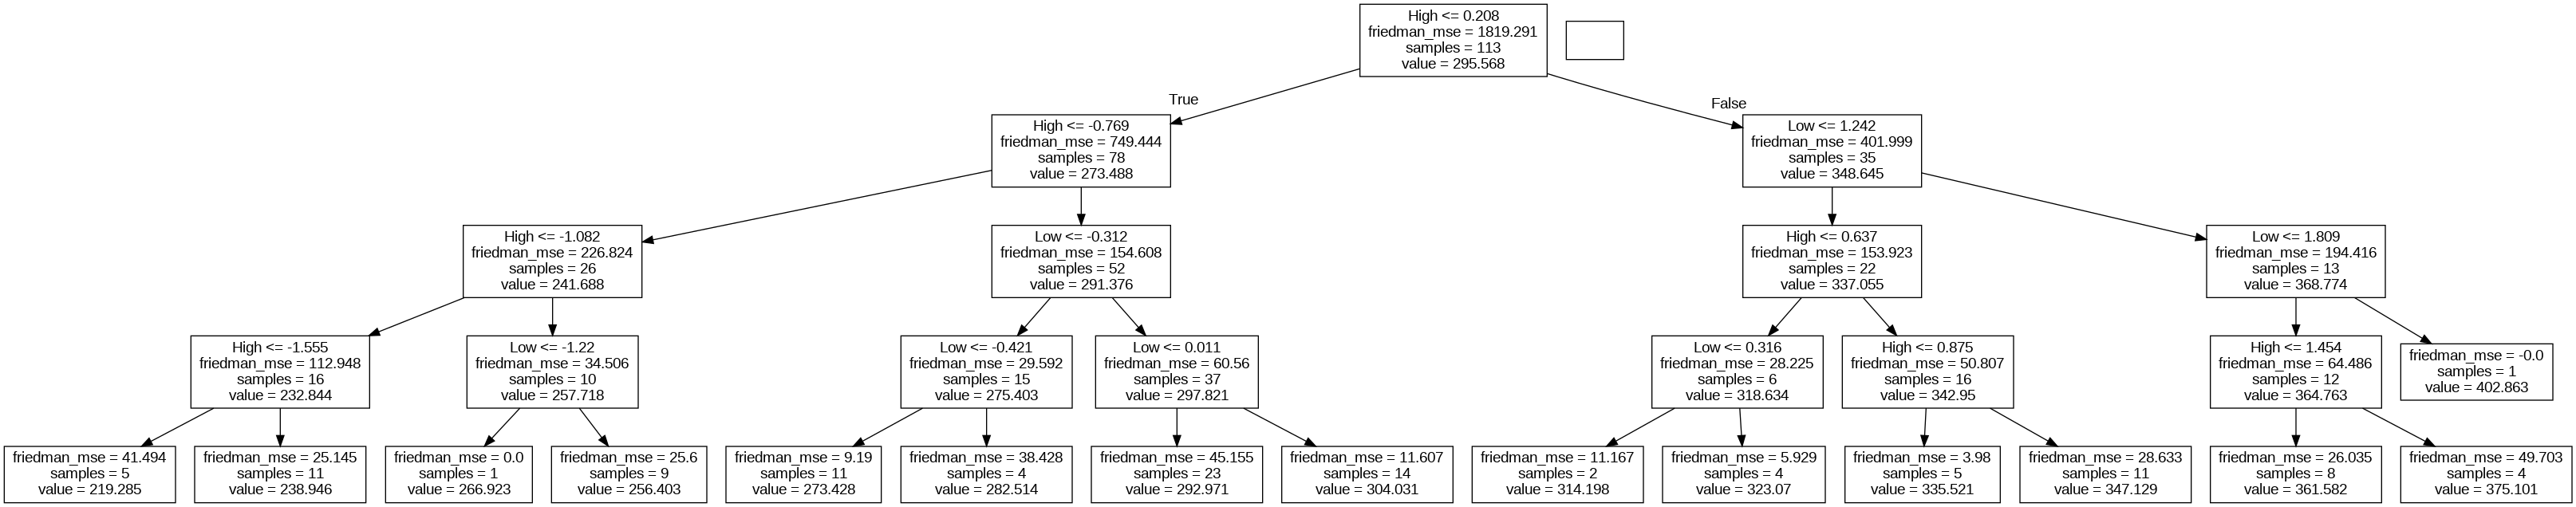

In [29]:
from IPython.display import Image
from sklearn import tree
import pydotplus

dot_data = tree.export_graphviz(RegModel.estimators_[5] , out_file=None, feature_names=Predictors, class_names=TargetVariable)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png(), width=5000,height=2000)

##Step 21: AdaBoost Algorithm for ML/AI model building

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)
R2 Value: 0.9866143146230895

#### Model Validation and Accuracy Calculations ####
       High       Low      Open       Close  Predicted Close
0 -0.517932 -0.433081 -0.435835  280.899994            279.0
1 -0.838435 -0.694832 -0.832088  264.536682            262.0
2  0.585986  0.479538  0.694435  314.633331            329.0
3 -0.571753 -0.479870 -0.519371  272.243347            278.0
4 -0.338764 -0.378368 -0.502505  290.533325            280.0
Mean Accuracy on test data: 97.79701474187374
Median Accuracy on test data: 97.99051627558165

Accuracy values for 10-fold Cross Validation:
 [98.31824216 98.19185005 98.09659828 97.1065699  97.81607078 97.91879822
 96.60858384 97.73714723 98.54087385 98.71405341]

Final Average Accuracy of the model: 97.9


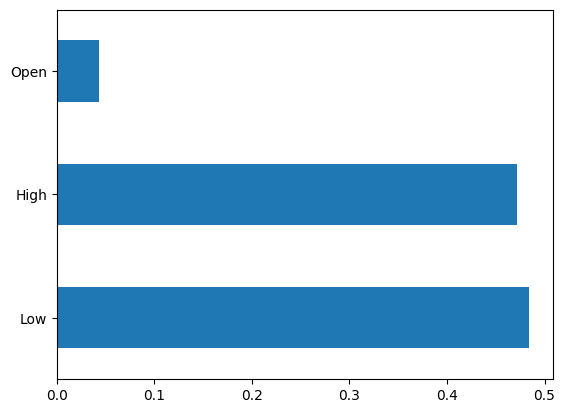

In [30]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

print(RegModel)

AB=RegModel.fit(X_train,Y_train)
prediction=AB.predict(X_test)

from sklearn import metrics

print('R2 Value:',metrics.r2_score(Y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

print('\n#### Model Validation and Accuracy Calculations ####')

# Printing sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=Y_test
TestingDataResults[('Predicted '+TargetVariable)]=np.round(prediction)

print(TestingDataResults.head())

# Calculating the errors
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Close']-TestingDataResults['Predicted Close']))/TestingDataResults['Close'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)

def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)


from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

from sklearn.model_selection import cross_val_score


# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , Y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

##XGBoost Regressor

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)
R2 Value: 0.9998816998397739

#### Model Validation and Accuracy Calculations ####
       High       Low      Open       Close  Predicted Close
0 -0.517932 -0.433081 -0.435835  280.899994            271.0
1 -0.838435 -0.694832 -0.832088  264.536682

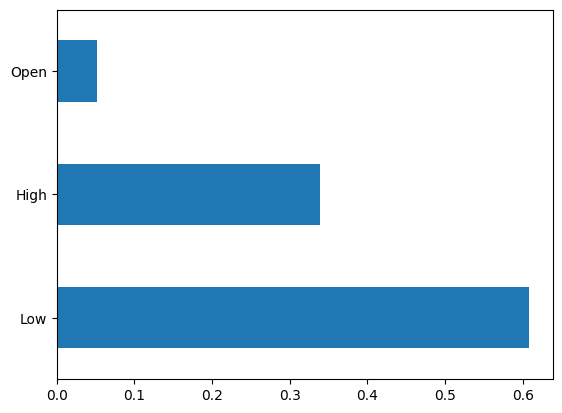

In [31]:
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Printing XGBoost parameters
print(RegModel)

XGB=RegModel.fit(X_train,Y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Training data

print('R2 Value:',metrics.r2_score(Y_train, XGB.predict(X_train)))


%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

print('\n#### Model Validation and Accuracy Calculations ####')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=Y_test
TestingDataResults[('Predicted '+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Close']-TestingDataResults['Predicted Close']))/TestingDataResults['Close'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)


def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)


from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

from sklearn.model_selection import cross_val_score


Accuracy_Values=cross_val_score(RegModel, X , Y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

##Decision Tree for XGBoost

<Axes: >

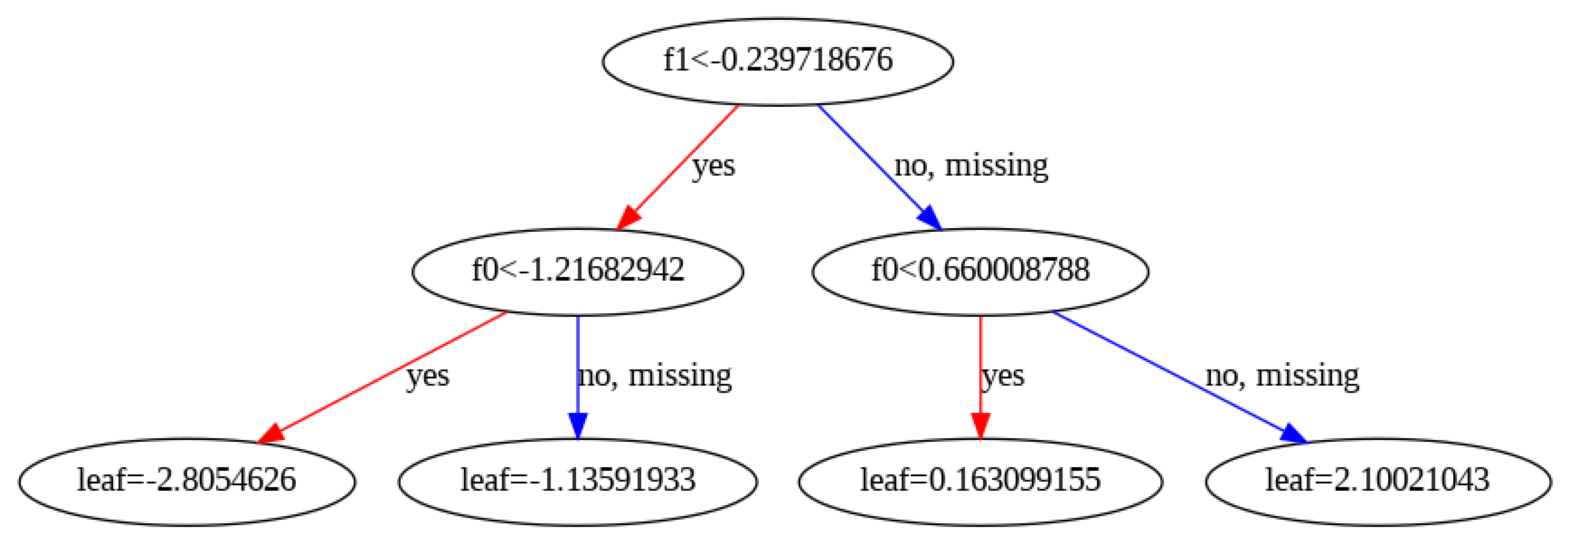

In [32]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

##K-Nearest Neighbour(KNN)

In [33]:
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

print(RegModel)

KNN=RegModel.fit(X_train,Y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
print('R2 Value:',metrics.r2_score(Y_train, KNN.predict(X_train)))

print('\n#### Model Validation and Accuracy Calculations ####')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=Y_test
TestingDataResults[('Predicted '+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Close']-TestingDataResults['Predicted Close']))/TestingDataResults['Close'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)

def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)

from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(RegModel, X , Y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.9899683035297969

#### Model Validation and Accuracy Calculations ####
       High       Low      Open       Close  Predicted Close
0 -0.517932 -0.433081 -0.435835  280.899994            275.0
1 -0.838435 -0.694832 -0.832088  264.536682            262.0
2  0.585986  0.479538  0.694435  314.633331            331.0
3 -0.571753 -0.479870 -0.519371  272.243347            276.0
4 -0.338764 -0.378368 -0.502505  290.533325            291.0
Mean Accuracy on test data: 98.11690169742349
Median Accuracy on test data: 98.52082971159415

Accuracy values for 10-fold Cross Validation:
 [98.87964074 97.91891199 98.0171813  97.4386027  98.5415593  97.95498756
 97.98635308 98.5317956  98.55758894 98.95604967]

Final Average Accuracy of the model: 98.28


##Support Vector Machine (SVM) Regressor


In [34]:
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)

print(RegModel)

SVM=RegModel.fit(X_train,Y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics
print('R2 Value:',metrics.r2_score(
  Y_train, SVM.predict(X_train)))

# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

print('\n#### Model Validation and Accuracy Calculations ####')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=Y_test
TestingDataResults[('Predicted '+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Close']-TestingDataResults['Predicted Close']))/TestingDataResults['Close'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , Y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

SVR(C=50, gamma=0.01)
R2 Value: 0.9782440720304595

#### Model Validation and Accuracy Calculations ####
       High       Low      Open       Close  Predicted Close
0 -0.517932 -0.433081 -0.435835  280.899994            277.0
1 -0.838435 -0.694832 -0.832088  264.536682            264.0
2  0.585986  0.479538  0.694435  314.633331            325.0
3 -0.571753 -0.479870 -0.519371  272.243347            275.0
4 -0.338764 -0.378368 -0.502505  290.533325            281.0
Mean Accuracy on test data: 98.01272518802736
Median Accuracy on test data: 98.49533733559822

Accuracy values for 10-fold Cross Validation:
 [98.68119519 98.0517634  98.1625847  97.66149164 98.30068568 97.85518536
 97.53486085 98.26085325 98.62118317 98.69986812]

Final Average Accuracy of the model: 98.18


## Most accurate model
- Multiple Linear Regression Algorithm with a 98.82 Accuracy

##Step 21: Model Deployment
* After testing our program in multiple Machine Learning algorithms we can now begin our deployment of the most accurate model which in this case is our Multiple Linear Regression Algorithm.
* Our most important predictor variables that we found were High and Low with some models using High more or low More with open only sometimes being incorporated in the process of predicting our target variable.  

In [35]:
TargetVariable='Close'

# Selecting the final set of predictors for the deployment
Predictors=['High', 'Low',]

X=DataForML_Numeric[Predictors].values
Y=DataForML_Numeric[TargetVariable].values

from sklearn.preprocessing import StandardScaler

#We have previously chosen Standardised as it fits out data set better
PredictorScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(Y.shape)

(253, 2)
(253,)


##Cross validating the final model accuracy with less predictors

In [36]:
from sklearn.model_selection import cross_val_score

# choose from different tunable hyper parameters
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')


Accuracy_Values=cross_val_score(RegModel, X , Y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [98.59812287 98.03660684 98.06613898 97.14020583 98.02550007 97.66368131
 97.88990052 97.95051918 98.6357847  98.23453342]

Final Average Accuracy of the model: 98.02


##Step 22: Retraining the model with all the data

In [37]:
Final_XGB_Model = RegModel.fit(X,Y)

##Step 23: Save the model as a serialised file which cna be stored anywhere

In [38]:
import pickle
import os

with open('Final_Multiple_Linear_Regression_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content/drive/MyDrive/MyCapstoneProject


## Step 24: Create a python function

In [39]:
from re import IGNORECASE
# This Function can be called from any from any front end tool/website

def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]

    DataForML=pd.read_pickle('DataForML.pkl')
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    InputData=pd.get_dummies(InputData)

    # Maintaining the same order of columns as it was during the model training
    Predictors=['High', 'Low']

    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]

    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)

    # Loading the Function from pickle file
    import pickle
    with open('Final_Multiple_Linear_Regression_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()

    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(PredictionResult)

##Step 25: Calling the function for some new data

In [60]:
NewSampleData=pd.DataFrame(data=[[384.79, 218.42],[280.01, 250.30]],columns=['High', 'Low'])

print(NewSampleData)

FunctionPredictResult(InputData=NewSampleData)

     High     Low
0  384.79  218.42
1  280.01  250.30


,Prediction
0,286.511139
1,253.399429


#Deploying a predictive model as an API  
##Function for predictions API

In [57]:
# Creating the function which can take inputs and return prediction
def FunctionGeneratePrediction(inp_High, inp_Low):

    # Creating a data frame for the model input
    SampleInputData=pd.DataFrame(
     data=[[inp_High, inp_Low]],
     columns=['High', 'Low'])

    # Calling the function defined above using the input parameters
    Predictions=FunctionPredictResult(InputData= SampleInputData)

    # Returning the predictions
    return(Predictions.to_json())

# Function call
FunctionGeneratePrediction( inp_High=371.08,
                           inp_Low=206.86,
                             )

'{"Prediction":{"0":280.4520874023}}'

#Web Deployment using Flask Library/Package Installing the flask library required to create the API

In [42]:
!pip install flask

#Creating Flask API

In [54]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy

In [55]:
app = Flask(__name__)

@app.route('/prediction_api', methods=["GET"])
def prediction_api():
    try:
        # Getting the paramters from API call
        High_value = float(request.args.get('High'))
        Low_value=float(request.args.get('Low'))

        # Calling the funtion to get predictions
        prediction_from_api=FunctionGeneratePrediction(
                                                       inp_High=High_value,
                                                       inp_Low=Low_value
                                                       )

        return (prediction_from_api)

    except Exception as e:
        return('Something is not right!:'+str(e))

##Starting the API engine

In [56]:
import os
if __name__ =="__main__":

    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=9000, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:9000
INFO:werkzeug:Press CTRL+C to quit
